In [63]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
df = pandas.read_csv("data.csv")

In [64]:
#initializing the decision tree values
d = {'Y': 1, 'N': 0}

df["Change"] = df["Change"].map(d)
df["Skip"] = df["Skip"].map(d)
df["Overtime"] = df["Overtime"].map(d)
df["Submit"] = df["Submit"].map(d)

########################################################

d = {'Relate': 1, 'Not Relate': 0}
df["Lable"] = df["Lable"].map(d)


In [65]:
features = ["Score" , "Change", "Skip", "Overtime", "Submit", "Worry", "Sad", "Happy", "Natural"]

x = df[features]
y = df["Lable"]

In [66]:
data_test = df.copy()

In [67]:
# Finding the best random state from 1 to 100 and test size from 0.10 to 0.90
results = []
for i in range(1, 100):
    for j in range(10, 90):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=j/100, random_state=i)
        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append(
            {
                "random_state": i,
                "test_size": j/100,
                "accuracy": accuracy,
                "train_test_split": {
                    "X_train": X_train,
                    "X_test": X_test,
                    "y_train": y_train,
                    "y_test": y_test,
                },
                "clf": clf,
                "y_pred": y_pred
            }
        )

# Finding the best accuracy from the results and get clf
max_accuracy = 0
best_result = None
for result in results:
    if result["accuracy"] > max_accuracy:
        max_accuracy = result["accuracy"]
        best_result = result

print("Accuracy: " + str(best_result["accuracy"]))
print("Random State: " + str(best_result["random_state"]))
print("Test Size: " + str(best_result["test_size"]))

Accuracy: 1.0
Random State: 10
Test Size: 0.28


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



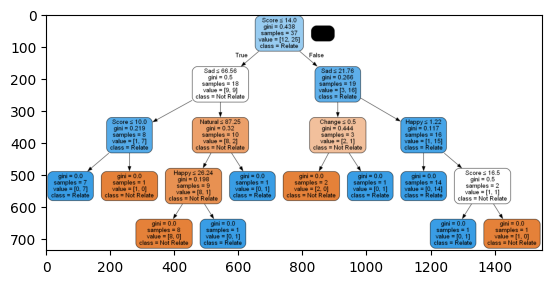

In [68]:
# Use best_result to get clf
clf = best_result["clf"]

# Calculating the accuracy
print("Accuracy:", best_result["accuracy"])

y_test = best_result["train_test_split"]["y_test"]
y_pred = best_result["y_pred"]
# Calculating the classification report
print(classification_report(y_test, y_pred))

# Plotting the decision tree
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=features,
    class_names=["Not Relate", "Relate"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")
img = pltimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# Predicting the values for the whole data
y_pred = clf.predict(x)

# Adding the predicted values to the data
data_test["Predicted"] = y_pred

# Saving the data to a csv file
data_test.to_csv("data_test.csv", index=False)

# Saving the decision tree to a png file
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=features,
    class_names=["Not Relate", "Relate"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")

# Saving the decision tree to a pdf file
graph.write_pdf("tree.pdf")

# Saving the decision tree to a dot file
tree.export_graphviz(
    clf,
    out_file="tree.dot",
    feature_names=features,
    class_names=["Not Relate", "Relate"],
    filled=True,
    rounded=True,
    special_characters=True,
)

In [69]:
print("Best Random State: ", best_random_state)
print("Best Test Size: ", best_test_size)

Best Random State:  10
Best Test Size:  0.32


In [70]:
# Export DecisionTreeClassifier model to a pickle file
import pickle
pickle.dump(clf, open("model.pkl", "wb"))

# Load DecisionTreeClassifier model from a pickle file
clf = pickle.load(open("model.pkl", "rb"))